<head>
    <h1>Model selection of GLM </h1>
    <p>AIC and goodness of prediction</p>
</head>

In [1]:
ls ../data

data3a.csv  data_R.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set();

In [3]:
df = pd.read_csv('../data/data3a.csv')

In [4]:
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


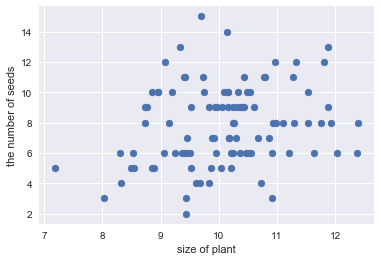

In [5]:
plt.scatter(df['x'], df['y']) 
plt.xlabel("size of plant")
plt.ylabel("the number of seeds")
plt.show()

In [6]:
import statsmodels.api as sm

/Users/kentasuzuki/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
import statsmodels.formula.api as smf

In [11]:
results = smf.glm('y ~ 1', data=df,
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 08 Oct 2018   Deviance:                       89.507
Time:                        23:11:02   Pearson chi2:                     87.1
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128


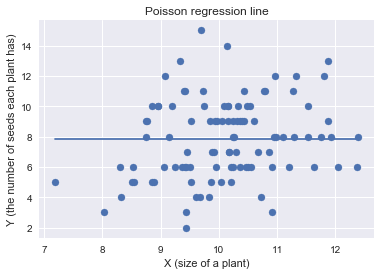

In [12]:
plt.scatter(df['x'], df['y']) 
plt.xlabel("size of plant")
plt.ylabel("the number of seeds")
xx = np.linspace(np.min(df['x']), np.max(df['x']),100)
plt.plot(xx, np.exp(2.0580 + 0 * xx))
plt.xlabel("X (size of a plant)")
plt.ylabel("Y (the number of seeds each plant has)")
plt.title("Poisson regression line")
plt.show()

In [13]:
results = smf.glm('y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4) + \
                  np.power(x, 5) + np.power(x, 6)' , data=df,
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       93
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -232.58
Date:                Mon, 08 Oct 2018   Deviance:                       79.385
Time:                        23:11:03   Pearson chi2:                     76.7
No. Iterations:                     4                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8185.6246   7764.790      1.054      0.292   -7033.084    2.34e+04
x              -4980.3818   4833.718    

In [14]:
results.params

Intercept         8185.624606
x                -4980.381838
np.power(x, 2)    1251.805404
np.power(x, 3)    -166.411214
np.power(x, 4)      12.344999
np.power(x, 5)      -0.484704
np.power(x, 6)       0.007871
dtype: float64

In [15]:
print(len(results.predict()))
print(len(df['x']))

100
100


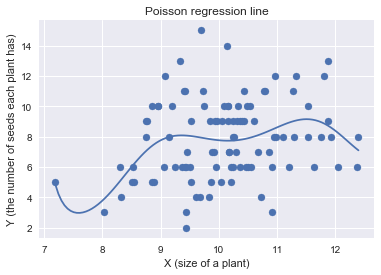

In [18]:
plt.scatter(df['x'], df['y']) 
plt.xlabel("size of plant")
plt.ylabel("the number of seeds")
xx = np.linspace(np.min(df['x']), np.max(df['x']),100)
plt.plot(xx, np.exp(results.params[0] + results.params[1] * xx + results.params[2] * np.power(xx, 2) 
                    + results.params[3] * np.power(xx,3) + results.params[4] * np.power(xx,4) 
                    + results.params[5] * np.power(xx,5) + results.params[6] * np.power(xx,6)))
plt.xlabel("X (size of a plant)")
plt.ylabel("Y (the number of seeds each plant has)")
plt.title("Poisson regression line")
plt.show()

In [19]:
results = smf.glm('y ~ x', data=df,
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 08 Oct 2018   Deviance:                       84.993
Time:                        23:14:31   Pearson chi2:                     83.8
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.0

In [33]:
print("Null Deviance {0:.2f}".format(results.null_deviance))
print("Residual Deviance {0:.2f}".format(results.deviance))
print("AIC {0:.2f}".format(results.aic))

Null Deviance 89.51
Residual Deviance 84.99
AIC 474.77


<h3>Deviance = -2 logL </h3>
<p>where logL is a maximum log-likelihood estimate</p>

In [35]:
import scipy
from scipy.stats import poisson

In [62]:
mlle_full_model = np.sum(np.log(poisson.pmf(df['y'], df['y'])))
deviance_full_model = -2 * mlle_full_model
# mle_full_model = np.sum(poisson.logpmf(df['y'], df['y']))
print('MLE of full model {0:.2f}'.format( mle_full_model))
print('Deviance of full model {0:.2f}'.format(deviance_full_model))

MLE of full model -192.89
Deviance of full model 385.78


In [64]:
log_l = -235.39
d = -2 * log_l
print(d)
rd = d - deviance_full_model
print("Residual Deviance: {0:.2f}".format(rd))

470.78
Residual Deviance: 85.00


In [65]:
null_results = smf.glm('y ~ 1', data=df,
                 family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(null_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Tue, 09 Oct 2018   Deviance:                       89.507
Time:                        01:54:02   Pearson chi2:                     87.1
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128


In [69]:
print(null_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Tue, 09 Oct 2018   Deviance:                       89.507
Time:                        01:55:10   Pearson chi2:                     87.1
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128
